In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Step 1: Exploratory Data Analysis

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Job/train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


Visualize is_duplicate distribution

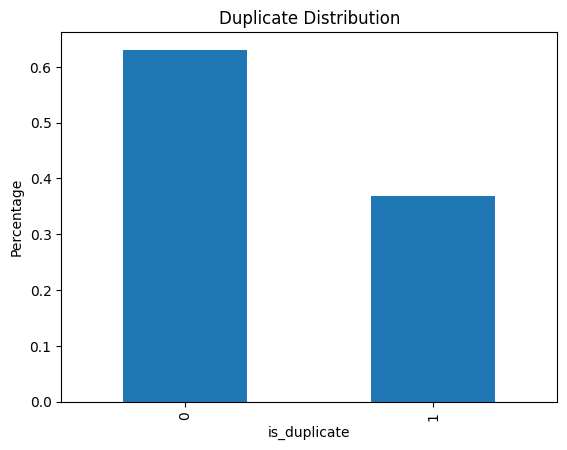

In [ ]:
df.is_duplicate.value_counts(normalize=True).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Duplicate Distribution')
plt.show()

Analyze the text columns (question1 and question2) using word clouds, sentence length, common words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


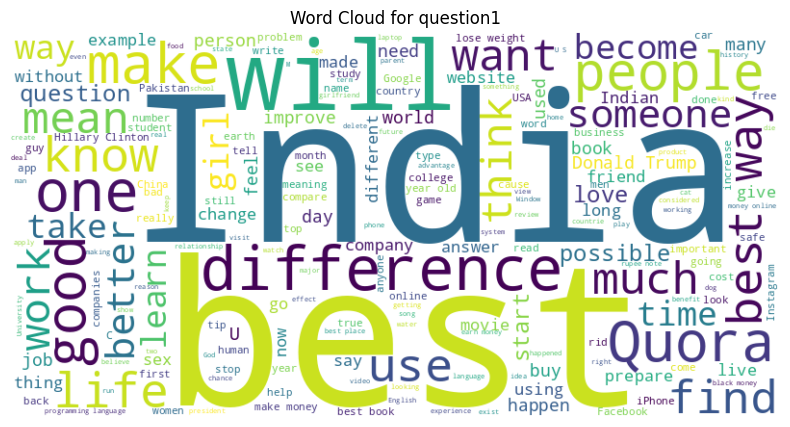

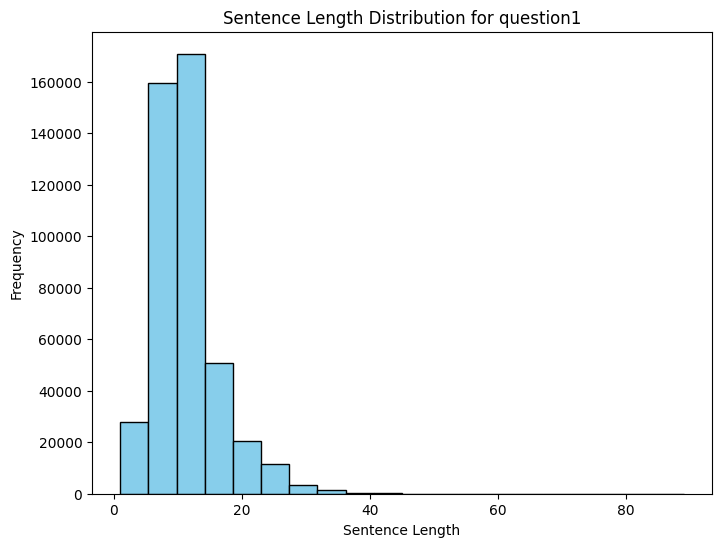

Top 10 most frequent words in question1:
best: 34199
get: 19027
india: 14244
people: 12742
like: 12586
good: 11988
would: 11559
one: 9624
quora: 8931
make: 8723


In [ ]:


import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

def analyze_text(df, column):

    text = ' '.join(df[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {column}")
    plt.show()


    sentence_lengths = []
    for question in df[column]:
      if isinstance(question, str):
        sentences = nltk.sent_tokenize(question)
        for sentence in sentences:
            sentence_lengths.append(len(word_tokenize(sentence)))
    plt.figure(figsize=(8, 6))
    plt.hist(sentence_lengths, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Sentence Length')
    plt.ylabel('Frequency')
    plt.title(f'Sentence Length Distribution for {column}')
    plt.show()


    stop_words = set(stopwords.words('english'))
    all_words = []
    for question in df[column]:
        if isinstance(question, str):
          words = word_tokenize(question.lower())
          for word in words:
              if word.isalnum() and word not in stop_words:
                  all_words.append(word)

    word_freq = nltk.FreqDist(all_words)
    top_words = word_freq.most_common(10)
    print(f"Top 10 most frequent words in {column}:")
    for word, freq in top_words:
        print(f"{word}: {freq}")


analyze_text(df, 'question1')



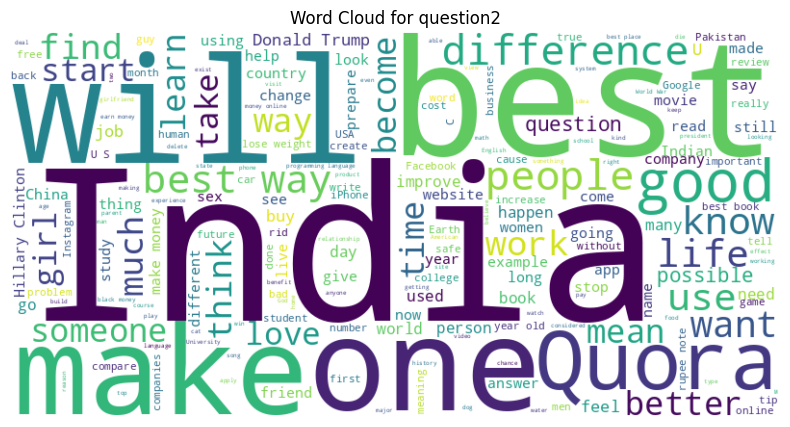

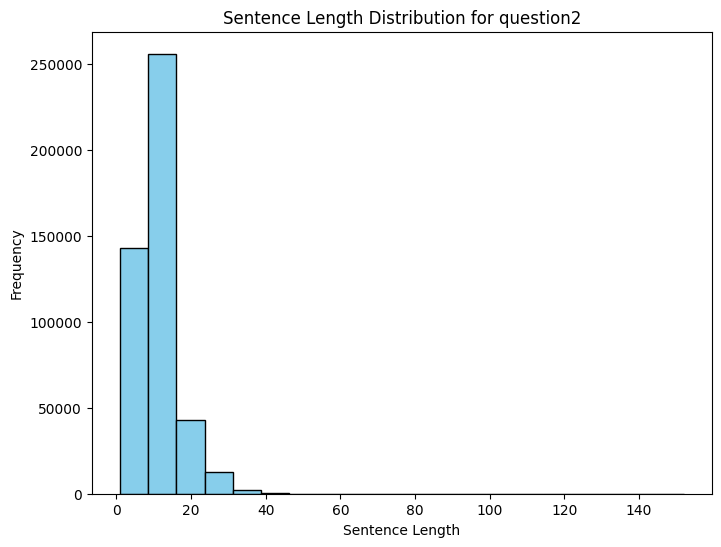

Top 10 most frequent words in question2:
best: 36273
get: 20486
india: 15153
people: 13631
like: 12925
good: 12778
would: 12306
one: 10159
way: 9536
make: 9441


In [ ]:
analyze_text(df, 'question2')

Check for missing values or outliers( through boxplot)

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
q1_len          0
q2_len          0
q1_words        0
q2_words        0
dtype: int64


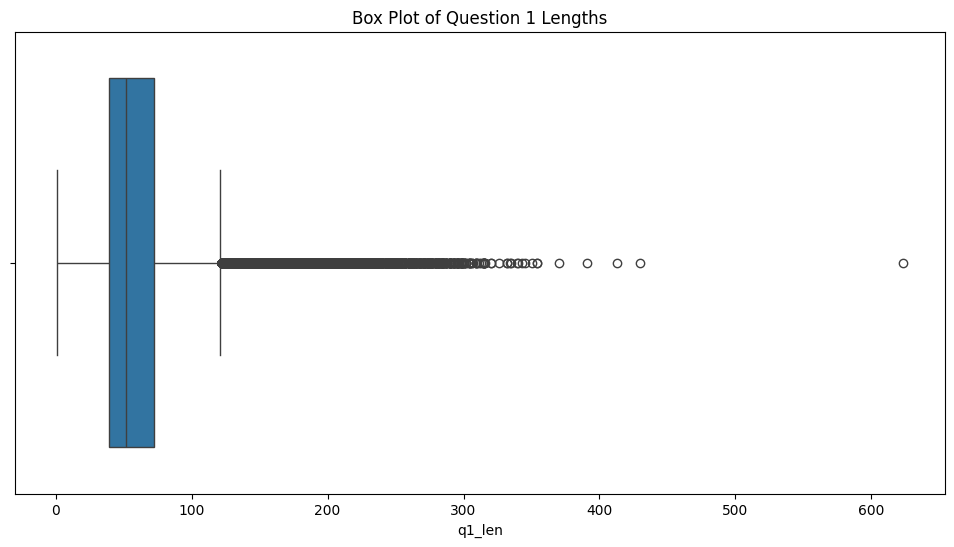

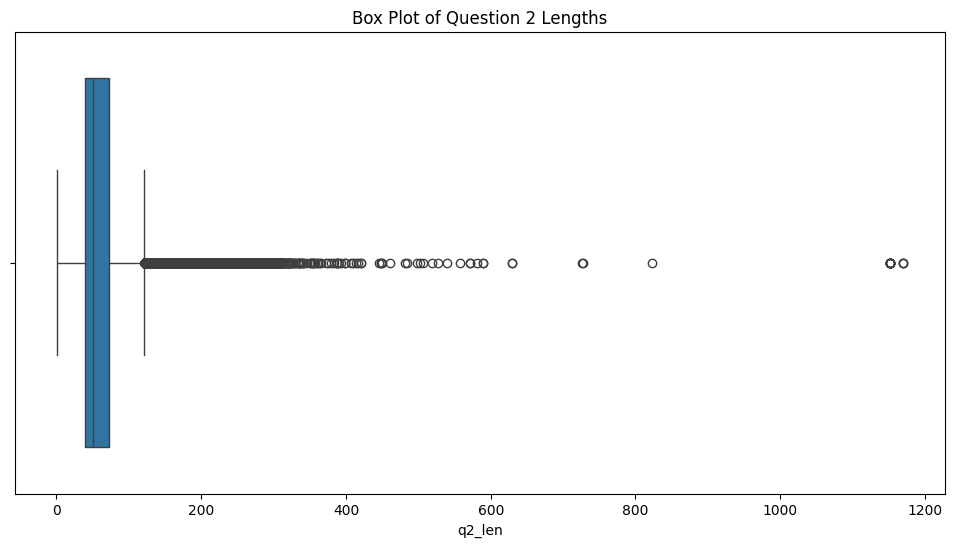

In [ ]:
print(df.isnull().sum())

df.fillna('', inplace=True)

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['q1_len'])
plt.title('Box Plot of Question 1 Lengths')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['q2_len'])
plt.title('Box Plot of Question 2 Lengths')
plt.show()

In [ ]:
df['q1_len'] = df['question1'].astype(str).apply(len)
df['q2_len'] = df['question2'].astype(str).apply(len)
df['q1_words'] = df['question1'].astype(str).apply(lambda x: len(x.split()))
df['q2_words'] = df['question2'].astype(str).apply(lambda x: len(x.split()))


Investigate if there are any significant correlations between features like question text length, character count, etc.

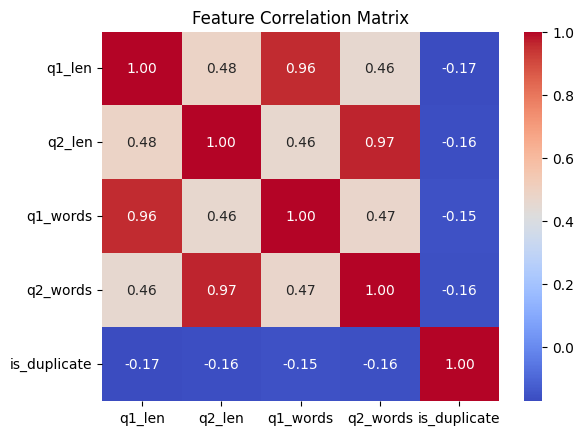

In [ ]:
corr_matrix = df[['q1_len', 'q2_len', 'q1_words', 'q2_words', 'is_duplicate']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


Step 2: Text Preprocessing

Tokenization: Split the questions into words.

In [ ]:
def tokenize_questions(df):
    df['question1_tokens'] = df['question1'].astype(str).apply(word_tokenize)
    df['question2_tokens'] = df['question2'].astype(str).apply(word_tokenize)
    return df

df = tokenize_questions(df)
df


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,question1_tokens,question2_tokens
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,"[What, is, the, step, by, step, guide, to, inv...","[What, is, the, step, by, step, guide, to, inv..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,"[What, is, the, story, of, Kohinoor, (, Koh-i-...","[What, would, happen, if, the, Indian, governm..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,"[How, can, I, increase, the, speed, of, my, in...","[How, can, Internet, speed, be, increased, by,..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,"[Why, am, I, mentally, very, lonely, ?, How, c...","[Find, the, remainder, when, [, math, ], 23^, ..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,"[Which, one, dissolve, in, water, quikly, suga...","[Which, fish, would, survive, in, salt, water, ?]"
...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,85,79,14,13,"[How, many, keywords, are, there, in, the, Rac...","[How, many, keywords, are, there, in, PERL, Pr..."
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1,41,42,8,9,"[Do, you, believe, there, is, life, after, dea...","[Is, it, true, that, there, is, life, after, d..."
404287,404287,537928,537929,What is one coin?,What's this coin?,0,17,17,4,3,"[What, is, one, coin, ?]","[What, 's, this, coin, ?]"
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,94,127,17,25,"[What, is, the, approx, annual, cost, of, livi...","[I, am, having, little, hairfall, problem, but..."


Lowercasing: Convert all text to lowercase to standardize.

In [ ]:

def lowercase_text(df):
    df['question1'] = df['question1'].astype(str).str.lower()
    df['question2'] = df['question2'].astype(str).str.lower()
    df['question1_tokens'] = df['question1_tokens'].apply(lambda x: [word.lower() for word in x])
    df['question2_tokens'] = df['question2_tokens'].apply(lambda x: [word.lower() for word in x])
    return df

df = lowercase_text(df)
df


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,question1_tokens,question2_tokens
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,"[what, is, the, step, by, step, guide, to, inv...","[what, is, the, step, by, step, guide, to, inv..."
1,1,3,4,what is the story of kohinoor (koh-i-noor) dia...,what would happen if the indian government sto...,0,51,88,8,13,"[what, is, the, story, of, kohinoor, (, koh-i-...","[what, would, happen, if, the, indian, governm..."
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,"[how, can, i, increase, the, speed, of, my, in...","[how, can, internet, speed, be, increased, by,..."
3,3,7,8,why am i mentally very lonely? how can i solve...,find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,"[why, am, i, mentally, very, lonely, ?, how, c...","[find, the, remainder, when, [, math, ], 23^, ..."
4,4,9,10,"which one dissolve in water quikly sugar, salt...",which fish would survive in salt water?,0,76,39,13,7,"[which, one, dissolve, in, water, quikly, suga...","[which, fish, would, survive, in, salt, water, ?]"
...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,how many keywords are there in the racket prog...,how many keywords are there in perl programmin...,0,85,79,14,13,"[how, many, keywords, are, there, in, the, rac...","[how, many, keywords, are, there, in, perl, pr..."
404286,404286,18840,155606,do you believe there is life after death?,is it true that there is life after death?,1,41,42,8,9,"[do, you, believe, there, is, life, after, dea...","[is, it, true, that, there, is, life, after, d..."
404287,404287,537928,537929,what is one coin?,what's this coin?,0,17,17,4,3,"[what, is, one, coin, ?]","[what, 's, this, coin, ?]"
404288,404288,537930,537931,what is the approx annual cost of living while...,i am having little hairfall problem but i want...,0,94,127,17,25,"[what, is, the, approx, annual, cost, of, livi...","[i, am, having, little, hairfall, problem, but..."


Removing stopwords, special characters, and unnecessary punctuation.

In [ ]:

import re

def remove_stopwords_and_special_chars(df):
    stop_words = set(stopwords.words('english'))
    def clean_text(text):
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text)
        filtered_tokens = [w for w in tokens if not w.lower() in stop_words and w.isalnum()]
        return " ".join(filtered_tokens)

    df['question1'] = df['question1'].astype(str).apply(clean_text)
    df['question2'] = df['question2'].astype(str).apply(clean_text)
    df['question1_tokens'] = df['question1_tokens'].apply(lambda x: [word for word in x if word not in stop_words and word.isalnum()])
    df['question2_tokens'] = df['question2_tokens'].apply(lambda x: [word for word in x if word not in stop_words and word.isalnum()])
    return df

df = remove_stopwords_and_special_chars(df)
df


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,question1_tokens,question2_tokens
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,66,57,14,12,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,51,88,8,13,"[story, kohinoor, diamond]","[would, happen, indian, government, stole, koh..."
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,73,59,14,10,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]"
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0,50,65,11,9,"[mentally, lonely, solve]","[find, remainder, math, 24, divided]"
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,76,39,13,7,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]"
...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,many keywords racket programming language late...,many keywords perl programming language latest...,0,85,79,14,13,"[many, keywords, racket, programming, language...","[many, keywords, perl, programming, language, ..."
404286,404286,18840,155606,believe life death,true life death,1,41,42,8,9,"[believe, life, death]","[true, life, death]"
404287,404287,537928,537929,one coin,whats coin,0,17,17,4,3,"[one, coin]",[coin]
404288,404288,537930,537931,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,0,94,127,17,25,"[approx, annual, cost, living, studying, uic, ...","[little, hairfall, problem, want, use, hair, s..."


Stemming or Lemmatization: Normalize words to their root form.

In [ ]:


from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

def stem_words(df):
    stemmer = PorterStemmer()
    df['question1_stemmed'] = df['question1_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])
    df['question2_stemmed'] = df['question2_tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

    return df

def lemmatize_words(df):
    lemmatizer = WordNetLemmatizer()
    df['question1_lemmatized'] = df['question1_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
    df['question2_lemmatized'] = df['question2_tokens'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
    return df

df = stem_words(df)
df = lemmatize_words(df)


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,question1_tokens,question2_tokens,question1_stemmed,question2_stemmed,question1_lemmatized,question2_lemmatized
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,66,57,14,12,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]"
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,51,88,8,13,"[story, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[stori, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo...","[story, kohinoor, diamond]","[would, happen, indian, government, stole, koh..."
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,73,59,14,10,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]"
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0,50,65,11,9,"[mentally, lonely, solve]","[find, remainder, math, 24, divided]","[mental, lone, solv]","[find, remaind, math, 24, divid]","[mentally, lonely, solve]","[find, remainder, math, 24, divided]"
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,76,39,13,7,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,many keywords racket programming language late...,many keywords perl programming language latest...,0,85,79,14,13,"[many, keywords, racket, programming, language...","[many, keywords, perl, programming, language, ...","[mani, keyword, racket, program, languag, late...","[mani, keyword, perl, program, languag, latest...","[many, keywords, racket, programming, language...","[many, keywords, perl, programming, language, ..."
404286,404286,18840,155606,believe life death,true life death,1,41,42,8,9,"[believe, life, death]","[true, life, death]","[believ, life, death]","[true, life, death]","[believe, life, death]","[true, life, death]"
404287,404287,537928,537929,one coin,whats coin,0,17,17,4,3,"[one, coin]",[coin],"[one, coin]",[coin],"[one, coin]",[coin]
404288,404288,537930,537931,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,0,94,127,17,25,"[approx, annual, cost, living, studying, uic, ...","[little, hairfall, problem, want, use, hair, s...","[approx, annual, cost, live, studi, uic, chica...","[littl, hairfal, problem, want, use, hair, sty...","[approx, annual, cost, living, studying, uic, ...","[little, hairfall, problem, want, use, hair, s..."


Feature Extraction: Using TF-IDF (Term Frequency-Inverse Document Frequency) to transform the questions into numerical representations.


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


question1_tfidf = tfidf_vectorizer.fit_transform(df['question1'])
question2_tfidf = tfidf_vectorizer.transform(df['question2'])




In [ ]:

print(question1_tfidf.shape)
question2_tfidf.shape

(404290, 80807)


(404290, 80807)

Feature Extraction: Using Word Embeddings (Word2Vec) to transform the questions into numerical representations.

In [ ]:
!pip install gensim

import gensim.downloader as api

try:
    word2vec_model = api.load('word2vec-google-news-300')
except Exception as e:
    print(f"Error loading Word2Vec model: {e}")
    print("Trying to download the model...")
    word2vec_model = api.load('word2vec-google-news-300')


def get_sentence_embedding(sentence, model, dim=300):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(dim)

df['question1_embedding'] = df['question1'].apply(lambda x: get_sentence_embedding(x, word2vec_model))
df['question2_embedding'] = df['question2'].apply(lambda x: get_sentence_embedding(x, word2vec_model))

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,question1_tokens,question2_tokens,question1_stemmed,question2_stemmed,question1_lemmatized,question2_lemmatized,question1_embedding,question2_embedding
0,0,1,2,step step guide invest share market india,step step guide invest share market,0,66,57,14,12,"[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]","[step, step, guide, invest, share, market, india]","[step, step, guide, invest, share, market]","[-0.11721366, 0.011160715, -0.024370465, -0.04...","[-0.09768677, 0.024983725, -0.030192057, -0.10..."
1,1,3,4,story kohinoor kohinoor diamond,would happen indian government stole kohinoor ...,0,51,88,8,13,"[story, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[stori, kohinoor, diamond]","[would, happen, indian, govern, stole, kohinoo...","[story, kohinoor, diamond]","[would, happen, indian, government, stole, koh...","[-0.1484375, 0.13189697, -0.04711914, -0.01257...","[-0.082240514, 0.07760184, 0.040527344, 0.1299..."
2,2,5,6,increase speed internet connection using vpn,internet speed increased hacking dns,0,73,59,14,10,"[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]","[increase, speed, internet, connection, using,...","[internet, speed, increased, hacking, dns]","[0.059733074, -0.0045522056, 0.05196126, 0.027...","[0.0012695312, 0.013500976, -0.054980468, -0.0..."
3,3,7,8,mentally lonely solve,find remainder math2324math divided 2423,0,50,65,11,9,"[mentally, lonely, solve]","[find, remainder, math, 24, divided]","[mental, lone, solv]","[find, remaind, math, 24, divid]","[mentally, lonely, solve]","[find, remainder, math, 24, divided]","[-0.029378256, 0.05965169, -0.20418549, 0.1729...","[0.0686442, -0.045735676, -0.021077475, 0.0806..."
4,4,9,10,one dissolve water quikly sugar salt methane c...,fish would survive salt water,0,76,39,13,7,"[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]","[one, dissolve, water, quikly, sugar, salt, me...","[fish, would, survive, salt, water]","[-0.09739855, 0.010375977, 0.09977213, 0.02490...","[-0.050097656, 0.14853516, 0.038427733, 0.0412..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,404285,433578,379845,many keywords racket programming language late...,many keywords perl programming language latest...,0,85,79,14,13,"[many, keywords, racket, programming, language...","[many, keywords, perl, programming, language, ...","[mani, keyword, racket, program, languag, late...","[mani, keyword, perl, program, languag, latest...","[many, keywords, racket, programming, language...","[many, keywords, perl, programming, language, ...","[0.106462754, -0.02129255, 0.038827352, 0.0799...","[0.10611398, 0.009085519, -0.0066092354, 0.147..."
404286,404286,18840,155606,believe life death,true life death,1,41,42,8,9,"[believe, life, death]","[true, life, death]","[believ, life, death]","[true, life, death]","[believe, life, death]","[true, life, death]","[-0.09220377, 0.054382324, 0.13232422, 0.10498...","[0.005126953, 0.06673177, 0.15690105, 0.078857..."
404287,404287,537928,537929,one coin,whats coin,0,17,17,4,3,"[one, coin]",[coin],"[one, coin]",[coin],"[one, coin]",[coin],"[-0.0024414062, 0.015136719, 0.013671875, 0.22...","[-0.06677246, 0.05883789, -0.013183594, 0.2597..."
404288,404288,537930,537931,approx annual cost living studying uic chicago...,little hairfall problem want use hair styling ...,0,94,127,17,25,"[approx, annual, cost, living, studying, uic, ...","[little, hairfall, problem, want, use, hair, s...","[approx, annual, cost, live, studi, uic, chica...","[li

In [ ]:

from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(embedding1, embedding2):
    if isinstance(embedding1, np.ndarray) and isinstance(embedding2, np.ndarray):
      return cosine_similarity(embedding1.reshape(1, -1), embedding2.reshape(1, -1))[0][0]
    else:
      return 0  #


df['cosine_similarity'] = df.apply(lambda row: calculate_cosine_similarity(row['question1_embedding'], row['question2_embedding']), axis=1)


Model Creation

Custom Artificial Neural Network (ANN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(df['cosine_similarity']).reshape(-1, 1)
y = df['is_duplicate']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Epoch 1/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6710 - loss: 0.5663 - val_accuracy: 0.6756 - val_loss: 0.5611
Epoch 2/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.6720 - loss: 0.5644 - val_accuracy: 0.6769 - val_loss: 0.5611
Epoch 3/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.6713 - loss: 0.5648 - val_accuracy: 0.6772 - val_loss: 0.5613
Epoch 4/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.6722 - loss: 0.5643 - val_accuracy: 0.6773 - val_loss: 0.5601
Epoch 5/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6723 - loss: 0.5645 - val_accuracy: 0.6772 - val_loss: 0.5615
Epoch 6/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.6715 - loss: 0.5652 - val_accuracy: 0.6763 - val_loss: 0.5601
Epoch 7/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.6730 - loss: 0.5644 - val_accuracy: 0.6771 - val_loss: 0.5605
Epoch 8/10
9097/9097 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.6713 - loss: 0

Pre-built model( Siamese Networks) in which two neural networks comparing the two question pairs for semantic similarity.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Lambda, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
df=df.sample(10000, random_state=2)

questions1 = df['question1']
questions2 = df['question2']
labels = df['is_duplicate']

questions1 = questions1.fillna('')
questions2 = questions2.fillna('')

max_sequence_length = 80
embedding_dim = 300
questions = df['question1'].astype(str) + ' ' + df['question2'].astype(str)

tokens = [word for sentence in questions for word in sentence.split()]

vocabulary_size = len(set(tokens))
questions = (questions1 + ' ' + questions2).astype(str)
tokenizer = Tokenizer(num_words=vocabulary_size)
tokenizer.fit_on_texts(questions)

sequences1 = tokenizer.texts_to_sequences(questions1)
sequences2 = tokenizer.texts_to_sequences(questions2)
padded_sequences1 = pad_sequences(sequences1, maxlen=max_sequence_length)
padded_sequences2 = pad_sequences(sequences2, maxlen=max_sequence_length)

input_layer1 = Input(shape=(max_sequence_length,))
input_layer2 = Input(shape=(max_sequence_length,))

embedding_layer = Embedding(input_dim=vocabulary_size, output_dim=embedding_dim)

lstm_layer = LSTM(units=50)

x1 = embedding_layer(input_layer1)
x1 = lstm_layer(x1)

x2 = embedding_layer(input_layer2)
x2 = lstm_layer(x2)

distance_layer = Lambda(lambda x: tf.keras.backend.abs(x[0] - x[1]))([x1, x2])

output_layer = Dense(units=1, activation='sigmoid')(distance_layer)

siamese_model = Model(inputs=[input_layer1, input_layer2], outputs=output_layer)

siamese_model.compile(optimizer=Adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True),
    ModelCheckpoint(filepath='siamese_model_weights.h5', save_best_only=True)
]

siamese_model.fit([padded_sequences1, padded_sequences2], labels, epochs=10, batch_size=32, validation_split=0.2, callbacks=callbacks)

Epoch 1/10
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5595 - loss: 0.6860

250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5599 - loss: 0.6859 - val_accuracy: 0.6220 - val_loss: 0.6499
Epoch 2/10
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6315 - loss: 0.6345

250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6315 - loss: 0.6345 - val_accuracy: 0.6220 - val_loss: 0.6419
Epoch 3/10
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6317 - loss: 0.6224

250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.6317 - loss: 0.6223 - val_accuracy: 0.6220 - val_loss: 0.6342
Epoch 4/10
247/250 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6263 - loss: 0.5976

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6264 - loss: 0.5976 - val_accuracy: 0.6220 - val_loss: 0.6293
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6405 - loss: 0.5552

250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6404 - loss: 0.5551 - val_accuracy: 0.6225 - val_loss: 0.6239
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6395 - loss: 0.5007 - val_accuracy: 0.6320 - val_loss: 0.6285
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.7143 - loss: 0.4554 - val_accuracy: 0.6295 - val_loss: 0.6278


Use LSTM (Long Short-Term Memory) as they are effective for sequence-based data like text.


In [ ]:
!pip install keras-preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from keras_preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/Job/test.csv')
test_data

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
3563470,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
3563471,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
3563472,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
3563473,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [ ]:
test_data=test_data.sample(2000, random_state=2)
test_data

,test_id,question1,question2
891576,891576,Do spirits than really exist?,Did really ghosts are between present?
705023,705023,What is the best grey quote ever said to you?,What do school kids face at school?
1686502,1686502,"When we meaning of ""itsuka"" in Japanese?","What is the model of ""nanika"" in Japanese?"
952079,952079,If after we die? Where does our conciousness go?,What instruments: after you die?
561980,561980,What English word is always pronounced type?,Is there one thing word that I can pronounce c...
...,...,...,...
3297452,2079773,How having can you track a person by phone num...,What strikes first by phone number?
2927817,1710138,What would purchases the wipro joining dates f...,Has wipro started its training for the 2016 sex?
105273,105273,Why don't women want to sleep after products?,Why prithviraj I feel refreshed after sleep?
1502577,1502577,Why do the people I know make fun of my hobby?,Do people actually have fun making fun of each...


In [ ]:
X_train = df.iloc[:,:5].values
Y_train = df.iloc[:,5:].values
X_train
X_testq1 = test_data.iloc[:,1:2].values
X_testq2 = test_data.iloc[:, 2:].values
s1 = X_train[:,3]
s2 = X_train[:,4]
def tokenize(s):
    tokens = []
    tokens = [word_tokenize(str(sentence)) for sentence in s]

    rm1 = []
    for w in tokens:
        sm = re.sub('[^A-Za-z]',' ', str(w))
        x = re.split("\s", sm)
        rm1.append(x)

    return rm1
def lower_case(s):
    for sent in s:
        while '' in sent:
            sent.remove('')

    low = []
    for i in s:
        i = [x.lower() for x in i]
        low.append(i)

    return low
def lemmatize(s):
    lemma = []
    wnl = WordNetLemmatizer()
    for doc in s:
        tokens = [wnl.lemmatize(w) for w in doc]
        lemma.append(tokens)

    filter_words = []
    Stopwords = set(stopwords.words('english'))

    for sent in lemma:
        tokens = [w for w in sent if w not in Stopwords]
        filter_words.append(tokens)

    space = ' '
    sentences = []
    for sentence in filter_words:
        sentences.append(space.join(sentence))

    return sentences

In [ ]:
MAX_NB_WORDS = 9000
tokenizer = Tokenizer(num_words = MAX_NB_WORDS)
tokenizer.fit_on_texts(list(df['question1'].values.astype(str))+list(df['question2'].values.astype(str)))

In [ ]:
X_train_q1 = tokenizer.texts_to_sequences(df['question1'].values.astype(str))
X_train_q1 = pad_sequences(X_train_q1, maxlen = 30, padding='post')

X_train_q2 = tokenizer.texts_to_sequences(df['question2'].values.astype(str))
X_train_q2 = pad_sequences(X_train_q2, maxlen = 30, padding='post')

In [ ]:
X_test_q1 = tokenizer.texts_to_sequences(X_testq1.ravel())
X_test_q1 = pad_sequences(X_test_q1,maxlen = 30, padding='post')

X_test_q2 = tokenizer.texts_to_sequences(X_testq2.astype(str).ravel())
X_test_q2 = pad_sequences(X_test_q2, maxlen = 30, padding='post')

In [ ]:
word_index = tokenizer.word_index

GloVe embedding

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-02-20 14:25:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-02-20 14:25:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-02-20 14:25:15--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_index = {}

with open('glove.6B.200d.txt','r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_index[word] = vectors
    f.close()

In [ ]:
embedding_matrix = np.random.random((len(word_index)+1, 200))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Input
from tensorflow.keras.models import Model

input_layer = Input(shape=(30,))

model_q1 = tf.keras.Sequential()
model_q1.add(Embedding(input_dim=len(word_index) + 1,
                       output_dim=200,
                       weights=[embedding_matrix],
                       input_length=30))
model_q1.add(LSTM(128, activation='tanh', return_sequences=True))
model_q1.add(Dropout(0.2))
model_q1.add(LSTM(128, return_sequences=True))
model_q1.add(LSTM(128))
model_q1.add(Dense(60, activation='tanh'))
model_q1.add(Dense(2, activation='sigmoid'))

model_q2 = tf.keras.Sequential()
model_q2.add(Embedding(input_dim=len(word_index) + 1,
                       output_dim=200,
                       weights=[embedding_matrix],
                       input_length=30))
model_q2.add(LSTM(128, activation='tanh', return_sequences=True))
model_q2.add(Dropout(0.2))
model_q2.add(LSTM(128, return_sequences=True))
model_q2.add(LSTM(128))
model_q2.add(Dense(60, activation='tanh'))
model_q2.add(Dense(2, activation='sigmoid'))


q1_output = model_q1(input_layer)
q2_output = model_q2(input_layer)
mergedOut = Multiply()([q1_output, q2_output])
mergedOut = Flatten()(mergedOut)
mergedOut = Dense(100, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(50, activation='relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(2, activation='sigmoid')(mergedOut)
final_model = Model(inputs=input_layer, outputs=mergedOut)

In [ ]:
new_model = Model([model_q1.input, model_q2.input], mergedOut)
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
history = new_model.fit([X_train_q1,X_train_q2],Y_train, batch_size = 100, epochs = 20)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8891 - loss: 0.2882
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9101 - loss: 0.2545
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9157 - loss: 0.2414
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9256 - loss: 0.2231
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.9294 - loss: 0.2103
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9353 - loss: 0.2001
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9441 - loss: 0.1750
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9454 - loss: 0.1717
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9521 - loss: 0.1511
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9575 - loss: 0.1328
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9538 - loss: 0.1456
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━

 Simpler Logistic Regression Model

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[['question1', 'question2']]
y = df['is_duplicate']

X['combined'] = X['question1'].astype(str) + ' ' + X['question2'].astype(str)
X['combined'] = X['combined'].fillna('')

X_train, X_test, y_train, y_test = train_test_split(X['combined'], y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(X_train_tfidf.shape, '  ', len(X_train))

classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)



(8000, 13416)    8000


LogisticRegression()

Step 4: Model Evaluation

Evaluate the model using common classification metrics: accuracy, precision, recall, F1-score.


Plot a Confusion Matrix to understand the number of true positives, true negatives, false positives, and false negatives.


AUC-ROC curve to visualize the tradeoff between true positive rate and false positive rate

In [ ]:
predictions = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.721
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      1234
           1       0.74      0.42      0.54       766

    accuracy                           0.72      2000
   macro avg       0.73      0.66      0.67      2000
weighted avg       0.72      0.72      0.70      2000



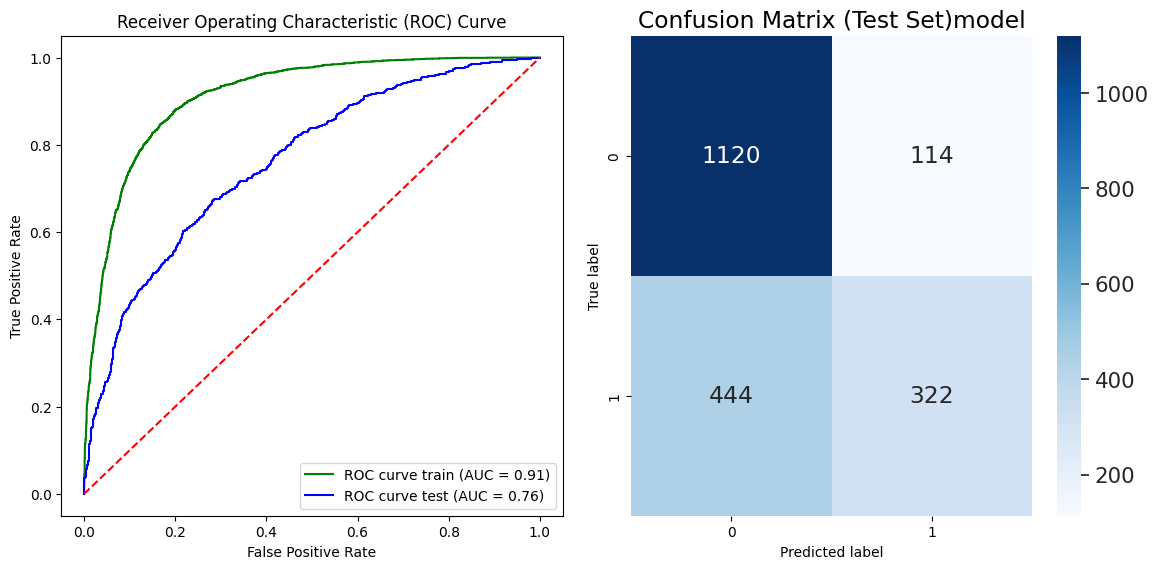

In [ ]:
def roc_curve__confusion_matrix(model):
    from sklearn.metrics import roc_curve, auc
    y_prob_test = model.predict_proba(X_test_tfidf)[:, 1]
    y_prob_train  = model.predict_proba(X_train_tfidf)[:, 1]
    prediction=model.predict(X_test_tfidf)

    fpr_test , tpr_test , thresholds = roc_curve(y_test, y_prob_test)
    fpr_train , tpr_train , thresholds1 = roc_curve(y_train, y_prob_train)

    roc_auc_test  = auc(fpr_test, tpr_test)
    roc_auc_train  = auc(fpr_train ,tpr_train)

    confusion_matrix_test = confusion_matrix(y_test, prediction)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    axs[0].plot(fpr_train, tpr_train, color='green', label='ROC curve train (AUC = %0.2f)' % roc_auc_train)
    axs[0].plot(fpr_test, tpr_test, color='blue', label='ROC curve test (AUC = %0.2f)' % roc_auc_test)
    axs[0].plot([0, 1], [0, 1], color='red', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axs[0].legend(loc="lower right")

    sns.set(font_scale=1.4)
    sns.heatmap(confusion_matrix_test, annot=True, fmt='g', cmap='Blues', ax=axs[1])
    axs[1].set_xlabel('Predicted label')

    axs[1].set_ylabel('True label')
    axs[1].set_title('Confusion Matrix (Test Set)model');

    plt.tight_layout()
    plt.show()
roc_curve__confusion_matrix(classifier)

Step 5: Model Tuning and Hyperparameter Optimization with RandomizedSearchCV



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'num_lstm_layers': [2, 3, 4],
    'dense_units': [[100, 50], [128, 64], [64, 32]],
    'dropout_rate': [0.1, 0.2, 0.3],
    'activation': ['relu', 'swish', 'tanh'],
    'optimizer': ['adam', 'sgd', 'rmsprop', 'adamw']
}

def train_model(params):
    X_train_q1_subset, X_val_q1, X_train_q2_subset, X_val_q2, Y_train_subset, Y_val = train_test_split(
        X_train_q1, X_train_q2, Y_train, test_size=0.2, random_state=42
    )
    history = new_model.fit([X_train_q1_subset, X_train_q2_subset], Y_train_subset,
                        validation_data=([X_val_q1, X_val_q2], Y_val),
                        batch_size=100, epochs=10, verbose=1)
    _, accuracy = new_model.evaluate([X_val_q1, X_val_q2], Y_val)
    return accuracy

best_acc = 0
best_params = None

for _ in range(10):
    params = {k: np.random.choice(v) if isinstance(v, list) and all(isinstance(item, (int, float, str)) for item in v) else v
              for k, v in param_grid.items()}

    acc = train_model(params)

    if acc > best_acc:
        best_acc = acc
        best_params = params

print(f"Best Accuracy: {best_acc}")
print(f"Best Parameters: {best_params}")

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.9858 - loss: 0.0589 - val_accuracy: 0.9790 - val_loss: 0.0790
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9870 - loss: 0.0526 - val_accuracy: 0.9780 - val_loss: 0.0845
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9865 - loss: 0.0515 - val_accuracy: 0.9705 - val_loss: 0.1071
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9884 - loss: 0.0508 - val_accuracy: 0.9675 - val_loss: 0.1226
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9880 - loss: 0.0539 - val_accuracy: 0.9690 - val_loss: 0.1191
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9894 - loss: 0.0516 - val_accuracy: 0.9710 - val_loss: 0.1066
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.9909 - loss: 0.0359 - val_accuracy: 0.9660 - val_loss: 0.1233
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.9910 - loss: 0.0412 - val_accuracy: 0.9660 - v

**Best Model**: LSTM which achieved 98% accuracy